In [ ]:
import scipy.io as sio
import numpy as np
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [41]:
matFile = sio.loadmat("mnist_10digits.mat")

xtrain = matFile["xtrain"]
ytrain = matFile["ytrain"].flatten()
xtest = matFile["xtest"]
ytest = matFile["ytest"].flatten()

type(xtrain)

numpy.ndarray

In [42]:
# Normalization
xtrain = xtrain.astype("float32") / 255.0
xtest = xtest.astype("float32") / 255.0

xtrain.shape

(60000, 784)

In [43]:
# Downsample training data to m = 5000
np.random.seed(13)
idx = np.random.choice(xtrain.shape[0], size=5000, replace=False)
x_sampled = xtrain[idx]
y_sampled = ytrain[idx]
x_sampled.shape
y_sampled.shape
np.unique(ytest)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
# random.seed(123)

# KNN

k = np.arange(1, 11, 1)
knn_cv_accuracy = np.zeros(10)

for indx, val in tqdm(enumerate(k), total=len(k), desc="Running KNN Cross-Validation"):
    knn = KNeighborsClassifier(algorithm="ball_tree", n_neighbors=val)
    cv_results = cross_validate(
        knn, x_sampled, y_sampled, cv=5, scoring="accuracy", n_jobs=-1
    )
    knn_cv_accuracy[indx] = np.mean(cv_results["test_score"])

Running KNN Cross-Validation: 100%|██████████| 10/10 [00:48<00:00,  4.80s/it]


Text(0, 0.5, 'CV accuracy score')

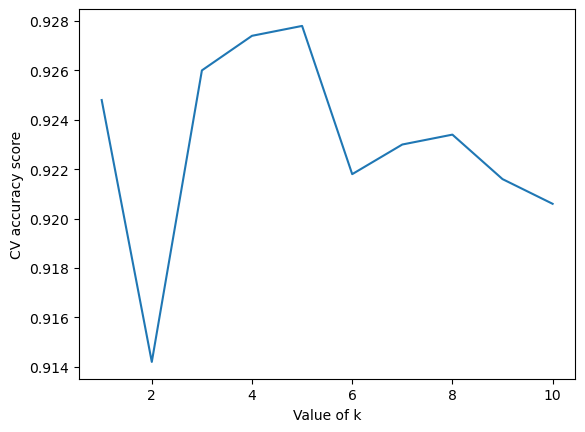

In [45]:
plt.plot(k, knn_cv_accuracy)
plt.xlabel("Value of k")
plt.ylabel("CV accuracy score")

In [46]:
np.argmax(knn_cv_accuracy)

np.int64(4)

Text(70.72222222222221, 0.5, 'True label')

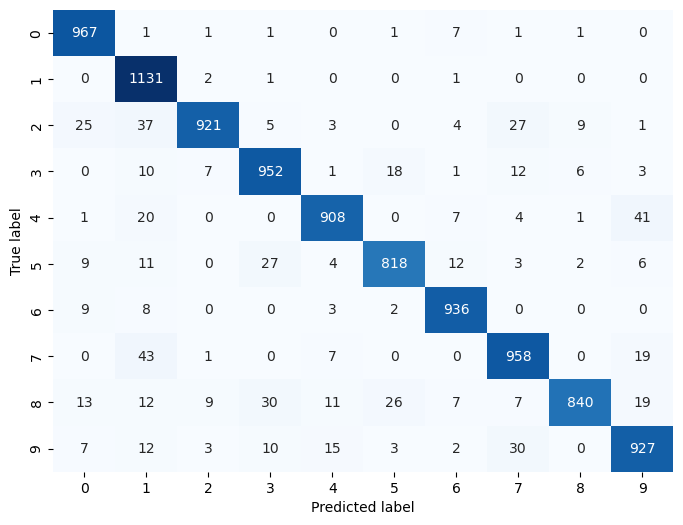

In [47]:
# Use k = 7
knn = KNeighborsClassifier(n_neighbors=7).fit(x_sampled, y_sampled)
knn_pred = knn.predict(xtest)
cm = confusion_matrix(ytest, knn_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10),
    cbar=False,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [48]:
# Code adapted from https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
print(
    f"Classification report for classifier knn:\n"
    f"{classification_report(ytest, knn_pred)}\n"
)

Classification report for classifier knn:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.88      1.00      0.93      1135
           2       0.98      0.89      0.93      1032
           3       0.93      0.94      0.94      1010
           4       0.95      0.92      0.94       982
           5       0.94      0.92      0.93       892
           6       0.96      0.98      0.97       958
           7       0.92      0.93      0.93      1028
           8       0.98      0.86      0.92       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000




c:\Users\jm121\miniconda3\envs\general_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\jm121\miniconda3\envs\general_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(70.72222222222221, 0.5, 'True label')

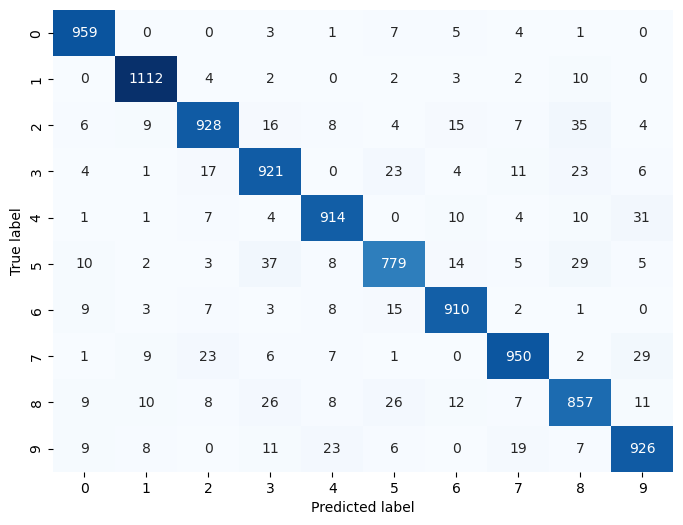

In [49]:
# Logistic Regression
logreg = LogisticRegression(solver="lbfgs", multi_class="multinomial").fit(
    xtrain, ytrain
)
logreg_pred = logreg.predict(xtest)

cm = confusion_matrix(ytest, logreg_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10),
    cbar=False,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [50]:
# Code adapted from https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
print(
    f"Classification report for classifier knn:\n"
    f"{classification_report(ytest, logreg_pred)}\n"
)

Classification report for classifier knn:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.94      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000




Text(70.72222222222221, 0.5, 'True label')

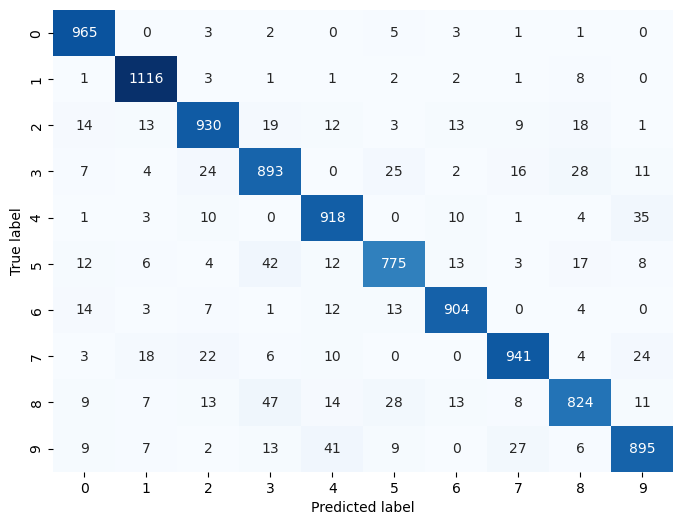

In [51]:
# SVM
linear_svm = svm.SVC(kernel="linear").fit(x_sampled, y_sampled)
lin_svm_pred = linear_svm.predict(xtest)

cm = confusion_matrix(ytest, lin_svm_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10),
    cbar=False,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [52]:
# Code adapted from https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
print(
    f"Classification report for classifier knn:\n"
    f"{classification_report(ytest, lin_svm_pred)}\n"
)

Classification report for classifier knn:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.91      0.90      0.91      1032
           3       0.87      0.88      0.88      1010
           4       0.90      0.93      0.92       982
           5       0.90      0.87      0.88       892
           6       0.94      0.94      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.90      0.85      0.87       974
           9       0.91      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000




Text(70.72222222222221, 0.5, 'True label')

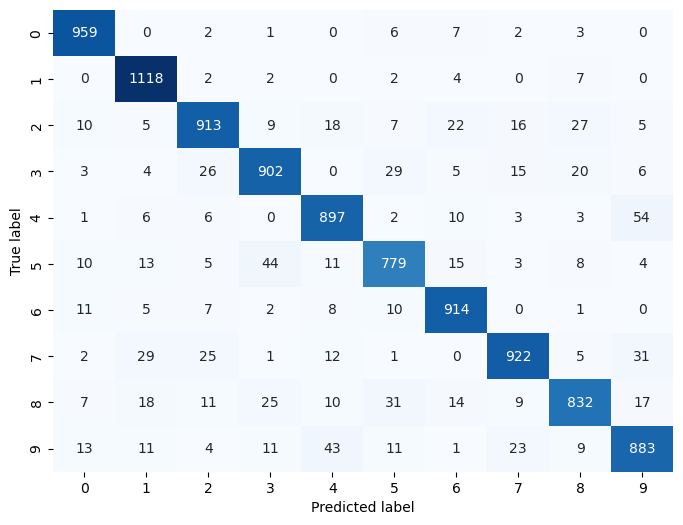

In [53]:
# Kernel SVM
rbf_svm = svm.SVC(kernel="rbf", gamma=0.001).fit(x_sampled, y_sampled)
rbf_svm_pred = rbf_svm.predict(xtest)

cm = confusion_matrix(ytest, rbf_svm_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10),
    cbar=False,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [54]:
# Code adapted from https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
print(
    f"Classification report for classifier knn:\n"
    f"{classification_report(ytest, rbf_svm_pred)}\n"
)

Classification report for classifier knn:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.92      0.99      0.95      1135
           2       0.91      0.88      0.90      1032
           3       0.90      0.89      0.90      1010
           4       0.90      0.91      0.91       982
           5       0.89      0.87      0.88       892
           6       0.92      0.95      0.94       958
           7       0.93      0.90      0.91      1028
           8       0.91      0.85      0.88       974
           9       0.88      0.88      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000




In [ ]:
# Neural Networks
# Code adapted from the demo code, plot_mnist_filters
mlp = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    max_iter=200,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)
mlp.fit(xtrain, ytrain)

print("Training set score: %f" % mlp.score(xtrain, ytrain))
print("Test set score: %f" % mlp.score(xtest, ytest))

Iteration 1, loss = 0.38883513
Iteration 2, loss = 0.19891793
Iteration 3, loss = 0.17243329
Iteration 4, loss = 0.15374281
Iteration 5, loss = 0.14479554
Iteration 6, loss = 0.13883667
Iteration 7, loss = 0.13082731
Iteration 8, loss = 0.12807426
Iteration 9, loss = 0.12052526
Iteration 10, loss = 0.11641828
Iteration 11, loss = 0.11186306
Iteration 12, loss = 0.10727472
Iteration 13, loss = 0.10615695
Iteration 14, loss = 0.10392582
Iteration 15, loss = 0.09994148
Iteration 16, loss = 0.09937763
Iteration 17, loss = 0.09743659
Iteration 18, loss = 0.09531283
Iteration 19, loss = 0.09475556
Iteration 20, loss = 0.09110975
Iteration 21, loss = 0.09060318
Iteration 22, loss = 0.08925921
Iteration 23, loss = 0.08856947
Iteration 24, loss = 0.08672395
Iteration 25, loss = 0.08629083
Iteration 26, loss = 0.08715194
Iteration 27, loss = 0.08391917
Iteration 28, loss = 0.08428724
Iteration 29, loss = 0.08348986
Iteration 30, loss = 0.08189952
Iteration 31, loss = 0.08076912
Iteration 32, los

Text(70.72222222222221, 0.5, 'True label')

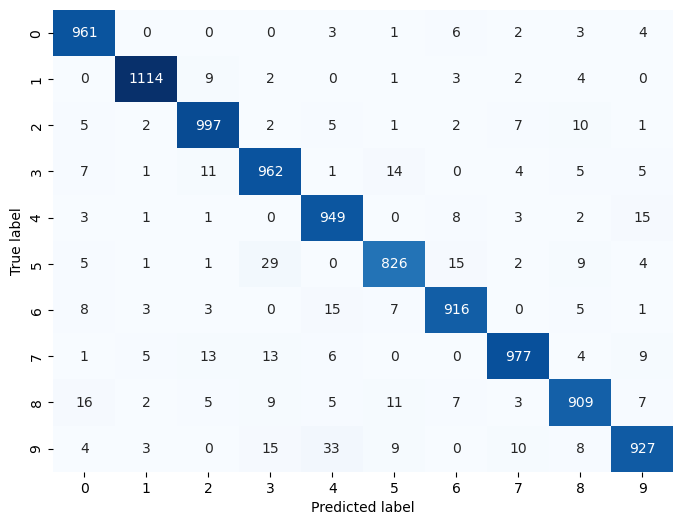

In [56]:
mlp_pred = mlp.predict(xtest)
cm = confusion_matrix(ytest, mlp_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10),
    cbar=False,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [57]:
# Code adapted from https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
print(
    f"Classification report for classifier knn:\n"
    f"{classification_report(ytest, mlp_pred)}\n"
)

Classification report for classifier knn:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.93      0.95      0.94      1010
           4       0.93      0.97      0.95       982
           5       0.95      0.93      0.94       892
           6       0.96      0.96      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.93      0.94       974
           9       0.95      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000


